## 1) Завантажити дані, вивести назви колонок і розмір датасета

In [1]:
import pandas as pd
import numpy as np

file_path = '../japanese+credit+screening/crx.data'
df = pd.read_csv(file_path)
print(f"Columns names:\n\t{df.columns.tolist()}")
print(f"{df.shape[0]} rows\n{df.shape[1]} columns")

Columns names:
	['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'target']
690 rows
16 columns


## 2) Опрацювати пропуски (по можливості заповнити їх або видалити)
#### Також для проведення подальших пунктів, потрібно перетворити нечислові значення у числові

In [2]:
df.info() #chech for null values

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))


df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


## 3) Візуалізувати дані: 
### побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); 
### побудувати гістограми розподілу ознак і 
### boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

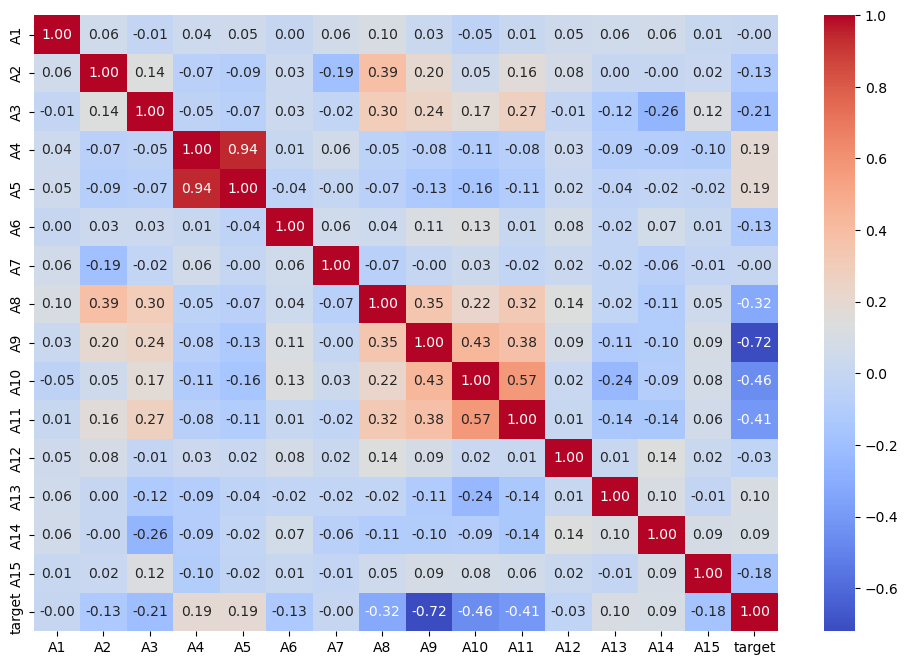

In [3]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

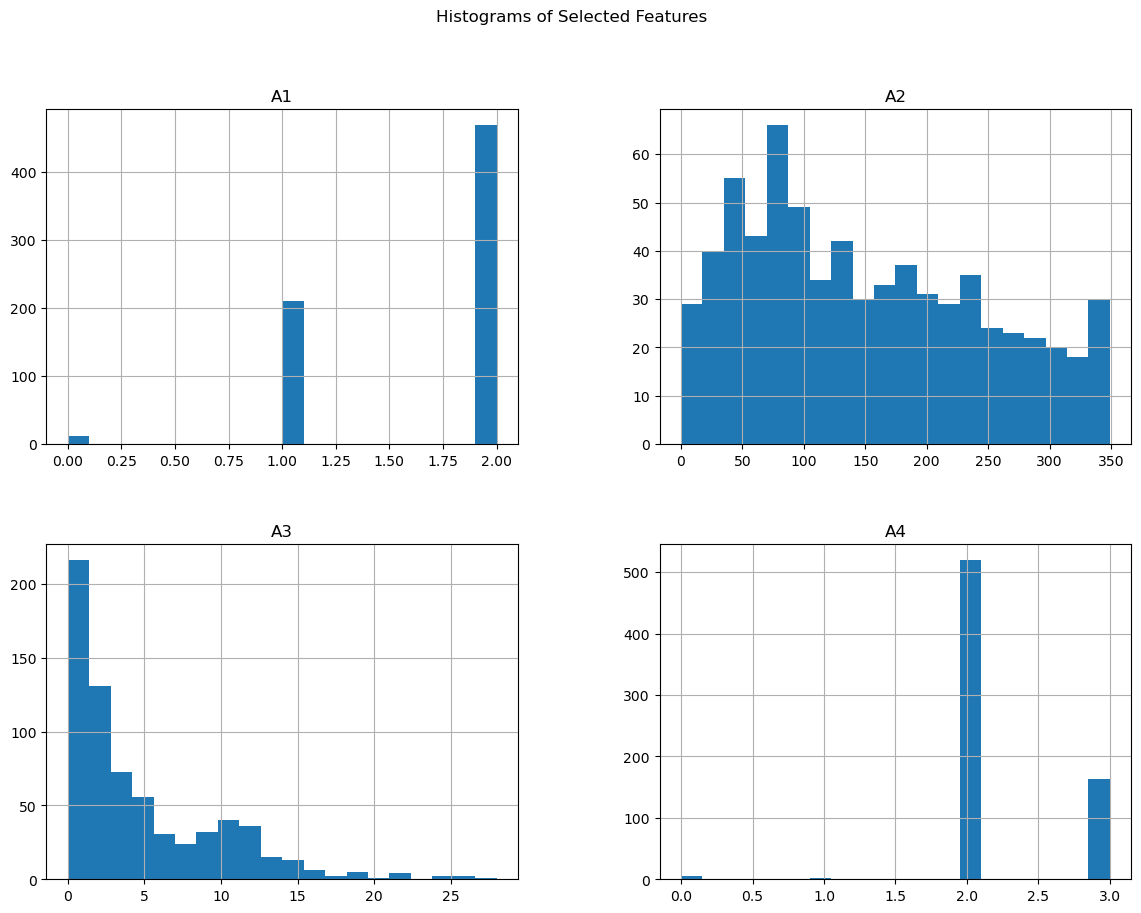

In [4]:
selected_columns = ['A1', 'A2', 'A3', 'A4']
df[selected_columns].hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms of Selected Features")
plt.show()

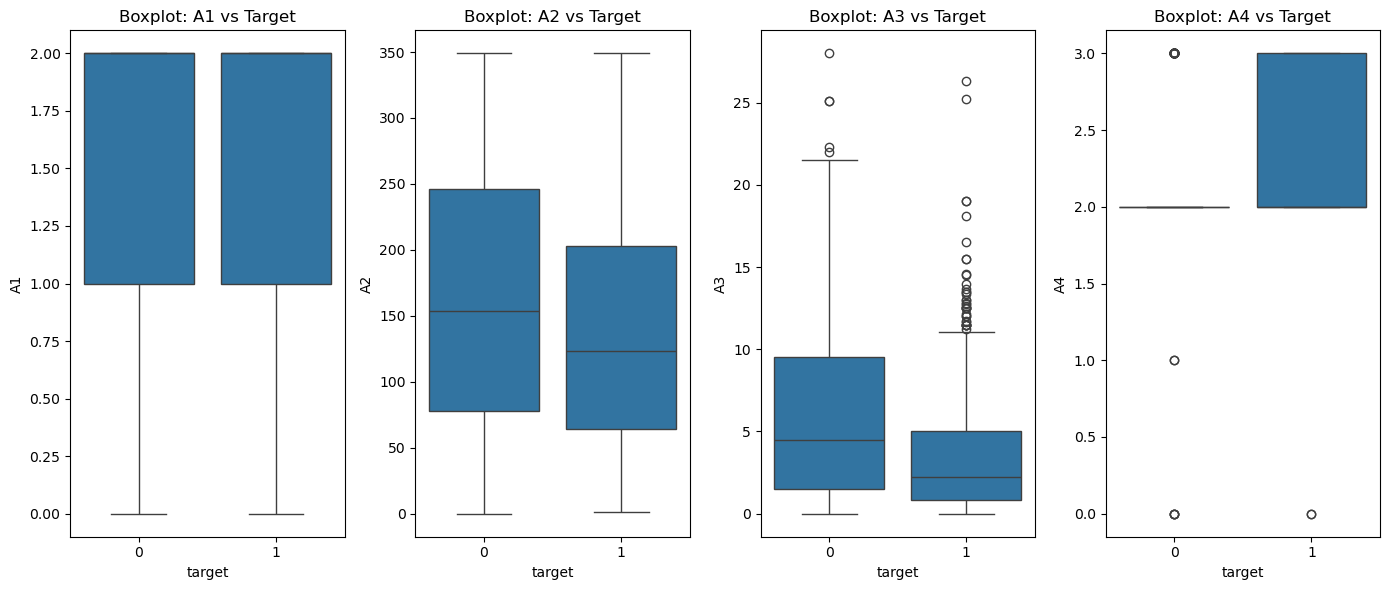

In [5]:
plt.figure(figsize=(14, 6))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, len(selected_columns), i)
    sns.boxplot(x=df['target'], y=df[col])
    plt.title(f'Boxplot: {col} vs Target')
plt.tight_layout()
plt.show()

## 4) Нормалізувати дані

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['A2','A7','A15']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,2,0.056919,0.000,2,1,13,0.773655,1.25,1,1,1,0,0,68,-0.195413,0
1,1,1.846363,4.460,2,1,11,-0.769183,3.04,1,1,6,0,0,11,-0.087852,0
2,1,-0.640132,0.500,2,1,11,-0.769183,1.50,1,0,0,0,0,96,-0.037144,0
3,2,-0.265597,1.540,2,1,13,0.773655,3.75,1,1,5,1,0,31,-0.194837,0
4,2,-1.118704,5.625,2,1,13,0.773655,1.71,1,0,0,0,2,37,-0.195413,0


## 5) Провести навчання наступних класифікаторів:

###    kNN
###    дерево ухвалення рішень
###    SVM
###    Random Forest
###    AdaBoost


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X = df.drop('target', axis=1)
y = df['target']
# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### kNN

In [17]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [16]:
knn = KNeighborsClassifier(n_neighbors=4)
params_knn = {'n_neighbors': range(1, 15)}
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)

print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("kNN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

kNN Classification Report
              precision    recall  f1-score   support

           0       0.76      0.53      0.62        70
           1       0.63      0.82      0.71        68

    accuracy                           0.67       138
   macro avg       0.69      0.68      0.67       138
weighted avg       0.69      0.67      0.67       138

kNN Confusion Matrix
[[37 33]
 [12 56]]


### дерево ухвалення рішень (Decision Tree)

In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        70
           1       0.72      0.79      0.76        68

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138

Decision Tree Confusion Matrix
[[49 21]
 [14 54]]


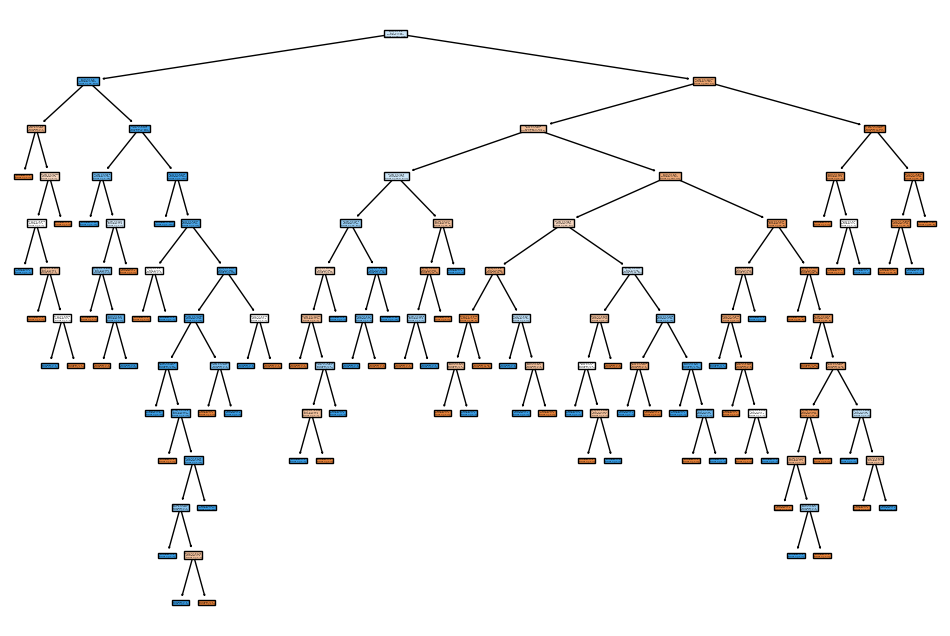

In [20]:
plt.figure(figsize = (12, 8))
plot_tree(dt, filled = True)
plt.show()

### SVM

In [21]:
svm = SVC()
params_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_svm = GridSearchCV(svm, param_grid=params_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        70
           1       0.77      0.90      0.83        68

    accuracy                           0.82       138
   macro avg       0.83      0.82      0.82       138
weighted avg       0.83      0.82      0.82       138

SVM Confusion Matrix
[[52 18]
 [ 7 61]]


### Random Forest

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        70
           1       0.85      0.88      0.86        68

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

Random Forest Confusion Matrix
[[59 11]
 [ 8 60]]


### AdaBoost

In [26]:
import warnings #для ігнорування попереджень
warnings.simplefilter(action='ignore', category=FutureWarning)

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ada))


AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        70
           1       0.80      0.82      0.81        68

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138

AdaBoost Confusion Matrix
[[56 14]
 [12 56]]
